<a href="https://colab.research.google.com/github/Vivek2222/AI-Launchpad/blob/main/Day_1_Assignment_1_Supervised_Learning_with_the_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Understanding the Iris Dataset
The Iris dataset is one of the most well-known datasets in machine learning, often used for classification tasks. It contains information about iris flowers of three species:

Setosa
Versicolor
Virginica


# Dataset Structure
The dataset includes the following:

Features (Inputs):

Sepal length (cm): Length of the outer part of the flower.
Sepal width (cm): Width of the outer part of the flower.
Petal length (cm): Length of the inner part of the flower.
Petal width (cm): Width of the inner part of the flower.
These are the numerical attributes used to distinguish the species.

Target (Output):

The species of the iris flower (setosa, versicolor, virginica).

# Goal of the Assignment
The objective is to:

Train a supervised learning model: Use the features to learn patterns that distinguish the flower species.
Make predictions: Use the trained model to classify flowers based on their features.
Evaluate performance: Measure how well the model performs using accuracy and other metrics.
This helps us understand how a machine learning model learns from data, predicts outcomes, and measures its effectiveness.

In [1]:
!pip install scikit-learn matplotlib pandas seaborn

## `Load and Explore the Dataset`

Why: To understand the structure of the dataset, check for missing values, and ensure data is ready for analysis.

Outcome: Gain familiarity with the data (e.g., feature names, species labels) and ensure the data is clean.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target

# Map target numbers to species names
data['species'] = data['species'].map({i: iris.target_names[i] for i in range(len(iris.target_names))})

# Display the first 5 rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


## `Split the Data`

Why: To divide the dataset into:

1.   Training set: Used to teach the model.
2.   Testing set: Used to evaluate how well the model generalizes to unseen data.

Outcome: Prevents overfitting and ensures robust evaluation.

In [3]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = data.iloc[:, :-1]
y = data['species']

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm shapes
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (120, 4)
Testing set size: (30, 4)


## `Train a Model`

Why: To let the machine learning algorithm "learn" the relationship between the features (inputs) and the species (outputs).

Outcome: A trained model that can classify iris flowers.


In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


## `Evaluate the Model`

Why: To measure the model's effectiveness in predicting the correct species using metrics like:


1.   Accuracy: The percentage of correctly classified examples.
2.   Confusion Matrix: Shows where the model makes errors.
3.   Classification Report: Detailed metrics like precision and recall for each species.

Outcome: Insights into the model's performance and areas needing improvement.

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.93
Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## `Visualize the Results`

Why: To make the evaluation easier to understand and highlight misclassifications.

Outcome: Visual tools (e.g., confusion matrix heatmap) for presenting results

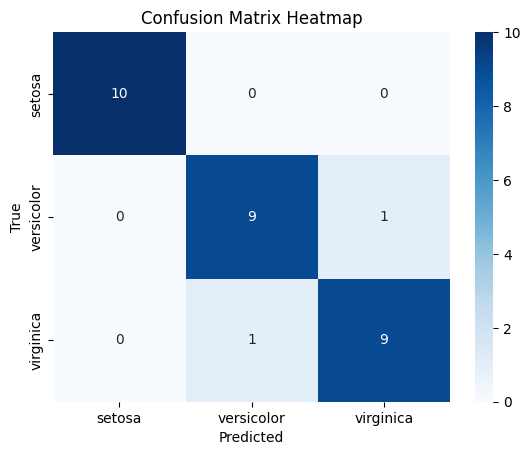

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

### `Make Predictions`
Why: To use the trained model to classify new, unseen flowers based on their features.
Outcome: Demonstrates how the model performs in real-world scenarios.


## `Final Goal`
By following these steps, you will:

Understand the structure and preparation of a dataset.
Learn how to train and test a machine learning model.
Evaluate and interpret the model's performance.
Practice the entire machine learning workflow using a classic example.